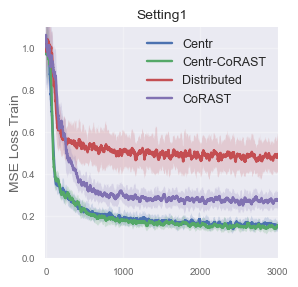

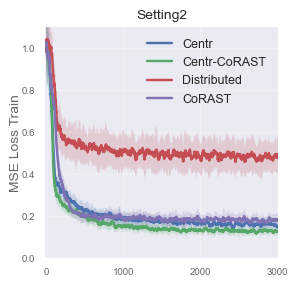

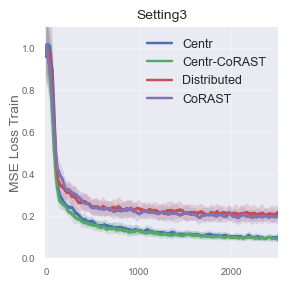

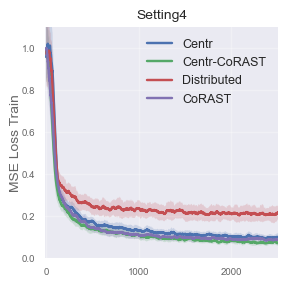

In [136]:
import numpy as np
import os, pickle
from einops import rearrange
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = "serif"
plt.style.use('seaborn-v0_8') 

def get_train(path):
    with open(os.path.join(path, 'train.pkl'), 'rb') as f:
        return np.array(pickle.load(f))
    
def plot(name, title, ds='weather', smooth=10, xlim=3000):
    fig = plt.figure(figsize=(3, 3), dpi=100)
    d1 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr0_dist')
    d2 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr0_central')
    d3 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr0_central')
    d4 = get_train(f'runs/{name}_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr0_dist')

    d1 = rearrange(d1, 'b l c -> l (b c)')
    d2 = rearrange(d2, 'b l c -> l (b c)')
    d3 = rearrange(d3, 'b l c -> l (b c)')
    d4 = rearrange(d4, 'b l c -> l (b c)')
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'valid')
    def movingvariance(interval, window_size):
        return np.array([np.var(interval[i:i+window_size]) for i in range(len(interval) - window_size + 1)])
    ds1 = np.average([movingaverage(d1[i], smooth) for i in range(len(d1))], axis=0)
    ds2 = movingaverage(d2[0], smooth)
    ds3 = movingaverage(d3[0], smooth)
    ds4 = np.average([movingaverage(d4[i], smooth) for i in range(len(d4))], axis=0)
    var2 = movingvariance(d2[0], smooth)
    var3 = movingvariance(d3[0], smooth)

    var1 = np.average([movingvariance(d1[i], smooth) for i in range(len(d1))], axis=0)
    var4 = np.average([movingvariance(d4[i], smooth) for i in range(len(d4))], axis=0)



    # for i in range(len(ds1)):
    #     plt.plot(ds1[i], alpha=0.1, label=i)
    plt.plot(ds2, label='Centr')
    plt.fill_between(np.arange(len(ds2)), ds2-np.sqrt(var2), ds2+np.sqrt(var2), alpha=0.2)
    plt.plot(ds3, label='Centr-CoRAST')
    plt.fill_between(np.arange(len(ds3)), ds3-np.sqrt(var3), ds3+np.sqrt(var3), alpha=0.2)

    plt.plot(ds1, label='Distributed')
    plt.fill_between(np.arange(len(ds1)), ds1-np.sqrt(var1), ds1+np.sqrt(var1), alpha=0.2)

    plt.plot(ds4, label='CoRAST')
    plt.fill_between(np.arange(len(ds4)), ds4-np.sqrt(var4), ds4+np.sqrt(var4), alpha=0.2)


    plt.legend(frameon=False, fontsize=9, loc='upper right')
    plt.xlim(-10, xlim)
    plt.ylim(0, 1.1)
    plt.title(title, fontsize=10)
    plt.ylabel('MSE Loss Train', fontsize=10, alpha=0.7, labelpad=0)

    plt.grid(axis='both', alpha=.3)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.yticks(fontsize=7, alpha=.7)
    plt.xticks(fontsize=7, alpha=.7)

    plt.savefig(f'{name}_{title}.png', bbox_inches='tight')
    # plt.yscale('log')

# plot('weather', 'weather')
plot('weather1', 'Setting1', smooth=25, xlim=3000)
plot('weather2', 'Setting2', smooth=25, xlim=3000)
plot('weather3', 'Setting3', smooth=40, xlim=2500)
plot('weather4', 'Setting4', smooth=40, xlim=2500)



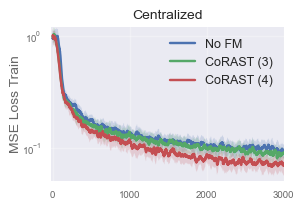

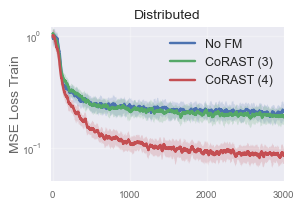

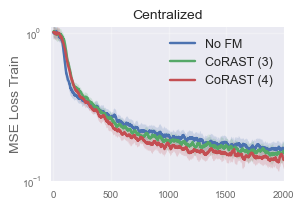

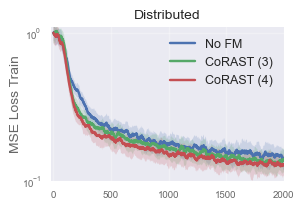

In [145]:

def plot_d(name, title, lt, ds='weather', smooth=10, xlim=3000, ymax=1.05, ymin=0.1):
    fig = plt.figure(figsize=(3, 2), dpi=100)
    d1 = get_train(f'runs/weather3_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr{lt}_{name}')
    d2 = get_train(f'runs/weather3_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr{lt}_{name}')
    d3 = get_train(f'runs/weather4_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr{lt}_{name}')

    d1 = rearrange(d1, 'b l c -> l (b c)')
    d2 = rearrange(d2, 'b l c -> l (b c)')
    d3 = rearrange(d3, 'b l c -> l (b c)')
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'valid')
    def movingvariance(interval, window_size):
        return np.array([np.var(interval[i:i+window_size]) for i in range(len(interval) - window_size + 1)])
    if name == 'central':

        ds1 = movingaverage(d1[0], smooth)
        ds2 = movingaverage(d2[0], smooth)
        ds3 = movingaverage(d3[0], smooth)
        var1 = movingvariance(d1[0], smooth)
        var2 = movingvariance(d2[0], smooth)
        var3 = movingvariance(d3[0], smooth)
    else:
        ds1 = np.average([movingaverage(d1[i], smooth) for i in range(len(d1))], axis=0)
        ds2 = np.average([movingaverage(d2[i], smooth) for i in range(len(d2))], axis=0)
        ds3 = np.average([movingaverage(d3[i], smooth) for i in range(len(d3))], axis=0)


        var1 = np.average([movingvariance(d1[i], smooth) for i in range(len(d1))], axis=0)
        var2 = np.average([movingvariance(d2[i], smooth) for i in range(len(d2))], axis=0)
        var3 = np.average([movingvariance(d3[i], smooth) for i in range(len(d3))], axis=0)


    # for i in range(len(ds1)):
    #     plt.plot(ds1[i], alpha=0.1, label=i)
    plt.plot(ds2, label='No FM')
    plt.fill_between(np.arange(len(ds2)), ds2-np.sqrt(var2), ds2+np.sqrt(var2), alpha=0.2)
    plt.plot(ds1, label='CoRAST (3)')
    plt.fill_between(np.arange(len(ds1)), ds1-np.sqrt(var1), ds1+np.sqrt(var1), alpha=0.2)
    plt.plot(ds3, label='CoRAST (4)')
    plt.fill_between(np.arange(len(ds3)), ds3-np.sqrt(var3), ds3+np.sqrt(var3), alpha=0.2)



    plt.legend(frameon=False, fontsize=9, loc='upper right')
    plt.xlim(-20, xlim)
    plt.ylim(ymin, ymax)
    plt.title(title, fontsize=10)
    plt.ylabel('MSE Loss Train', fontsize=10, alpha=0.7, labelpad=0)
    plt.yscale('log')

    plt.grid(axis='both', alpha=.3)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.yticks(fontsize=7, alpha=.7)
    plt.xticks(fontsize=7, alpha=.7)

    plt.savefig(f'{name}_{title}_{lt}3.png', bbox_inches='tight')
    # plt.yscale('log')

# plot('weather', 'weather')

plot_d('central', 'Centralized', 0, smooth=25, xlim=3000, ymin=0.05, ymax=1.2)
plot_d('dist', 'Distributed', 0, smooth=25, xlim=3000, ymin=0.05, ymax=1.2)
plot_d('central', 'Centralized', 1, smooth=25, xlim=2000, ymin=0.1, ymax=1.1)
plot_d('dist', 'Distributed', 1, smooth=25, xlim=2000, ymin=0.1, ymax=1.1)

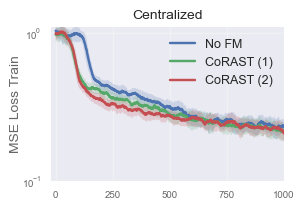

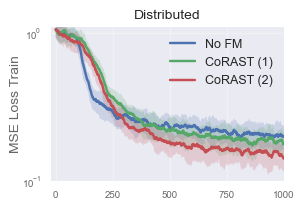

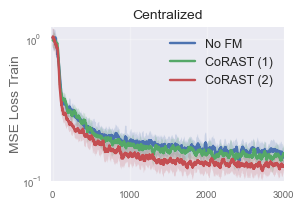

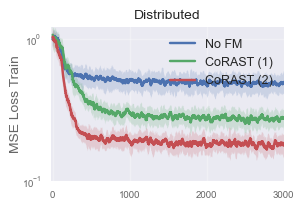

In [144]:

def plot_d(name, title, lt, ds='weather', smooth=10, xlim=3000, ymax=1.05, ymin=0.1):
    fig = plt.figure(figsize=(3, 2), dpi=100)
    d1 = get_train(f'runs/weather1_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr{lt}_{name}')
    d2 = get_train(f'runs/weather1_TCN_{ds}_sl128_ll10_pl48_el3_gl0_lr{lt}_{name}')
    d3 = get_train(f'runs/weather2_TCN_{ds}_sl128_ll10_pl48_el3_gl1_lr{lt}_{name}')

    d1 = rearrange(d1, 'b l c -> l (b c)')
    d2 = rearrange(d2, 'b l c -> l (b c)')
    d3 = rearrange(d3, 'b l c -> l (b c)')
    def movingaverage(interval, window_size):
        window= np.ones(int(window_size))/float(window_size)
        return np.convolve(interval, window, 'valid')
    def movingvariance(interval, window_size):
        return np.array([np.var(interval[i:i+window_size]) for i in range(len(interval) - window_size + 1)])
    if name == 'central':

        ds1 = movingaverage(d1[0], smooth)
        ds2 = movingaverage(d2[0], smooth)
        ds3 = movingaverage(d3[0], smooth)
        var1 = movingvariance(d1[0], smooth)
        var2 = movingvariance(d2[0], smooth)
        var3 = movingvariance(d3[0], smooth)
    else:
        ds1 = np.average([movingaverage(d1[i], smooth) for i in range(len(d1))], axis=0)
        ds2 = np.average([movingaverage(d2[i], smooth) for i in range(len(d2))], axis=0)
        ds3 = np.average([movingaverage(d3[i], smooth) for i in range(len(d3))], axis=0)


        var1 = np.average([movingvariance(d1[i], smooth) for i in range(len(d1))], axis=0)
        var2 = np.average([movingvariance(d2[i], smooth) for i in range(len(d2))], axis=0)
        var3 = np.average([movingvariance(d3[i], smooth) for i in range(len(d3))], axis=0)


    # for i in range(len(ds1)):
    #     plt.plot(ds1[i], alpha=0.1, label=i)
    plt.plot(ds2, label='No FM')
    plt.fill_between(np.arange(len(ds2)), ds2-np.sqrt(var2), ds2+np.sqrt(var2), alpha=0.2)
    plt.plot(ds1, label='CoRAST (1)')
    plt.fill_between(np.arange(len(ds1)), ds1-np.sqrt(var1), ds1+np.sqrt(var1), alpha=0.2)
    plt.plot(ds3, label='CoRAST (2)')
    plt.fill_between(np.arange(len(ds3)), ds3-np.sqrt(var3), ds3+np.sqrt(var3), alpha=0.2)



    plt.legend(frameon=False, fontsize=9, loc='upper right')
    plt.xlim(-20, xlim)
    plt.ylim(ymin, ymax)
    plt.title(title, fontsize=10)
    plt.ylabel('MSE Loss Train', fontsize=10, alpha=0.7, labelpad=0)
    plt.yscale('log')

    plt.grid(axis='both', alpha=.3)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.yticks(fontsize=7, alpha=.7)
    plt.xticks(fontsize=7, alpha=.7)

    plt.savefig(f'{name}_{title}_{lt}.png', bbox_inches='tight')
    # plt.yscale('log')

# plot('weather', 'weather')
plot_d('central', 'Centralized', 1, smooth=25, xlim=1000,ymin=0.1, ymax=1.1)
plot_d('dist', 'Distributed', 1, smooth=25, xlim=1000,ymin=0.1, ymax=1.1)
plot_d('central', 'Centralized', 0, smooth=25, xlim=3000, ymin=0.1, ymax=1.2)
plot_d('dist', 'Distributed', 0, smooth=25, xlim=3000, ymin=0.1, ymax=1.2)
